In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [10]:
import pickle

In [321]:
from tensorflow.keras.models import load_model

In [11]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, Activation

In [12]:
from keras import regularizers
from keras.optimizers import Adam
from keras.optimizers import Adadelta

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from keras.utils import to_categorical

In [15]:
from keras.callbacks import EarlyStopping

In [36]:
from sklearn.utils import shuffle

## Data preprocessing

In [16]:
train_images = []
val_images = []

train_labels = []
val_labels = []

path = '../dataset/Train/Train'

for ltr in os.listdir(path):
    i = 0
    for img in os.listdir(f'{path}/{ltr}'):
        image = mpimg.imread(f'{path}/{ltr}/{img}')
        image = image.reshape(64, 64, 1)
        if i<150:
            val_images.append(image)        
            val_labels.append(int(ltr))
        else:
            train_images.append(image)        
            train_labels.append(int(ltr))
        i+=1

path2 = '../augmented_dataset'

for ltr in os.listdir(path2):
    i = 0
    for img in os.listdir(f'{path2}/{ltr}'):
        image = mpimg.imread(f'{path2}/{ltr}/{img}')
        image = image.reshape(64, 64, 1)
        if i<150:
            val_images.append(image)        
            val_labels.append(int(ltr))
        else:
            train_images.append(image)        
            train_labels.append(int(ltr))
        i+=1

In [22]:
print(len(train_images), len(train_labels))

92016 92016


In [24]:
print(len(val_images), len(val_labels))

23400 23400


In [25]:
X_train = train_images.copy()
y_train = train_labels.copy()

X_test = val_images.copy()
y_test = val_labels.copy()

In [27]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [30]:
y_train = to_categorical(y_train, num_classes = 78)
y_test = to_categorical(y_test, num_classes = 78)

In [37]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

## Model training

In [185]:
model = Sequential()

model.add(Conv2D(16, kernel_size = (3, 3), input_shape = (64, 64, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size = (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(78, activation = 'softmax'))

c:\users\user\desktop\python_smart_code\jupyter\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [186]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

In [187]:
model.compile(optimizer = Adam(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [188]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, callbacks=[early_stop])

Epoch 1/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.1004 - loss: 3.7301 - val_accuracy: 0.5983 - val_loss: 1.4839
Epoch 2/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.4573 - loss: 1.8092 - val_accuracy: 0.7705 - val_loss: 0.8125
Epoch 3/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.5961 - loss: 1.3102 - val_accuracy: 0.8363 - val_loss: 0.6006
Epoch 4/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.6717 - loss: 1.0619 - val_accuracy: 0.8439 - val_loss: 0.5503
Epoch 5/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.7142 - loss: 0.9345 - val_accuracy: 0.8797 - val_loss: 0.4269
Epoch 6/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.7441 - loss: 0.8350 - val_accuracy: 0.8779 - val_loss: 0.4218
Epoch 7/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.7657 - loss: 0.7594 - val_accuracy: 0.9005 - val_loss: 0.3389
Epoch 8/20
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.7831 -

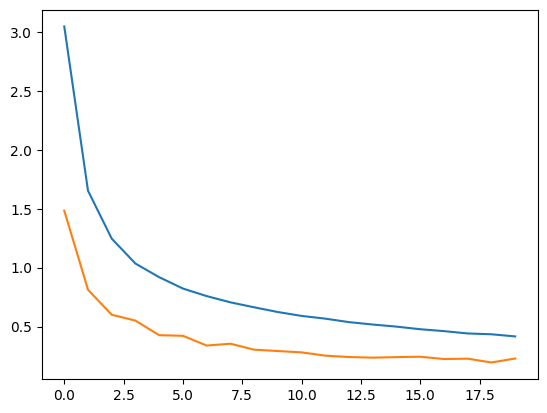

In [189]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

## Model saving

In [352]:
with open('models/aug_arm_pkl_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [353]:
model.save('models/aug_arm_h5_model.h5')

In [190]:
letters_dict = {
    0: 'Ա', 1: 'Բ', 2: 'Գ', 3: 'Դ', 4: 'Ե', 5: 'Զ', 6: 'Է', 7: 'Ը', 8: 'Թ', 9: 'Ժ',
    10: 'Ի', 11: 'Լ', 12: 'Խ', 13: 'Ծ', 14: 'Կ', 15: 'Հ', 16: 'Ձ', 17: 'Ղ', 18: 'Ճ', 19: 'Մ',
    20: 'Յ', 21: 'Ն', 22: 'Շ', 23: 'Ո', 24: 'Ու', 25: 'Չ', 26: 'Պ', 27: 'Ջ', 28: 'Ռ', 29: 'Ս',
    30: 'Վ', 31: 'Տ', 32: 'Ր', 33: 'Ց', 34: 'Փ', 35: 'Ք', 36: 'Եվ', 37: 'Օ', 38: 'Ֆ',
    39: 'ա', 40: 'բ', 41: 'գ', 42: 'դ', 43: 'ե', 44: 'զ', 45: 'է', 46: 'ը', 47: 'թ', 48: 'ժ',
    49: 'ի', 50: 'լ', 51: 'խ', 52: 'ծ', 53: 'կ', 54: 'հ', 55: 'ձ', 56: 'ղ', 57: 'ճ', 58: 'մ',
    59: 'յ', 60: 'ն', 61: 'շ', 62: 'ո', 63: 'ու', 64: 'չ', 65: 'պ', 66: 'ջ', 67: 'ռ', 68: 'ս',
    69: 'վ', 70: 'տ', 71: 'ր', 72: 'ց', 73: 'փ', 74: 'ք', 75: 'և', 76: 'օ', 77: 'ֆ'
}

In [191]:
def pred_def(p):
    return int(np.argmax(p)), letters_dict[np.argmax(p)]

## Prediciont

In [350]:
l1 = mpimg.imread('test_images/Letter.jpg')
l1 = cv2.cvtColor(l1, cv2.COLOR_RGB2GRAY)
l1 = cv2.resize(l1, (64, 64))
l1 = cv2.bitwise_not(l1)
l1 = l1.reshape(1, 64, 64, 1)

pred = arm_h5_model.predict(l1)

pred_def(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(0, 'Ա')

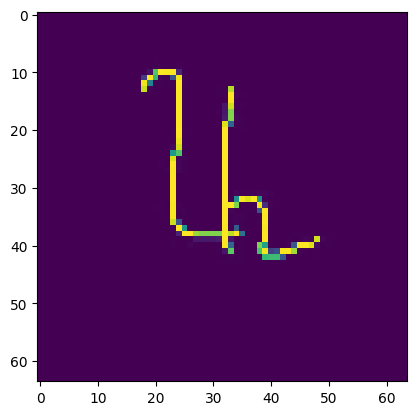

In [351]:
l1 = mpimg.imread('test_images/Letter.jpg')
l1 = cv2.cvtColor(l1, cv2.COLOR_RGB2GRAY)
l1 = cv2.resize(l1, (64, 64))
l1 = cv2.bitwise_not(l1)
plt.imshow(l1)

## Model loading

In [354]:
with open('models/aug_arm_pkl_model.pkl', 'rb') as file:
    aug_arm_pkl_model = pickle.load(file)

c:\users\user\desktop\python_smart_code\jupyter\venv\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 24 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [355]:
aug_arm_h5_model = load_model('models/aug_arm_h5_model.h5')

In [356]:
!pip freeze > requirements.txt